## Imports

In [175]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
tqdm_notebook().pandas()
from datetime import datetime

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'svg'

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

In [22]:
# df = pd.read_pickle('../data/df_sent.pkl')

In [23]:
# df.shape

(2811774, 10)

In [4]:
ioDF = pd.read_pickle('../data/io.pkl')

In [5]:
ioDF.shape

(794299, 27)

In [8]:
ioDF.columns.tolist()

['tweet_id_x',
 'author_id_x',
 'inbound_x',
 'created_at_x',
 'text_x',
 'response_tweet_id_x',
 'in_response_to_tweet_id_x',
 'date_x',
 'time_x',
 'month_x',
 'all_sent_x',
 'group_id_x',
 'tweet_num_x',
 'tweet_id_y',
 'author_id_y',
 'inbound_y',
 'created_at_y',
 'text_y',
 'response_tweet_id_y',
 'in_response_to_tweet_id_y',
 'date_y',
 'time_y',
 'month_y',
 'all_sent_y',
 'group_id_y',
 'tweet_num_y',
 'response_time']

In [27]:
filtered = pd.read_pickle('../data/filtered.pkl')

In [28]:
filtered.shape

(1993038, 13)

In [30]:
filtered.groupby('group_id').tweet_id.count()

group_id
group_0          7
group_1          6
group_100        4
group_1000       4
group_10000      4
group_100002     3
group_100004     4
group_100009     6
group_100010     8
group_100013     4
group_100014     3
group_100022     3
group_100023     3
group_100026     3
group_100029     3
group_100031     3
group_100034     3
group_100037     8
group_100038     4
group_100039     6
group_10004      3
group_100040     6
group_100041     4
group_100044    10
group_100047    17
group_10005      6
group_100050    14
group_100052     4
group_100053     6
group_100054     4
                ..
group_9994       3
group_99941      3
group_99942      6
group_99944      3
group_99948      7
group_99949      4
group_99950      4
group_99951      6
group_99953      4
group_99954      6
group_99955      4
group_99958      4
group_99959      4
group_99961      4
group_99964      6
group_99967      3
group_9997       4
group_99971      3
group_99981      3
group_99982      3
group_99986      6
gro

In [163]:
ioDF.author_id_x.nunique()

597075

## Negative Tweets

In [40]:
neg_tweets = ioDF[ioDF.all_sent_x < -.5]

In [156]:
neg_tweets.shape

(130782, 27)

In [41]:
neg_tweets.shape

(130782, 27)

In [42]:
negGroups = list(neg_tweets.group_id_x)
num_convos = len(set(negGroups))
print(f'Working with {num_convos} conversations')
companyNeg = filtered[filtered.group_id.isin(negGroups)]
# companyNegInbound = companyNeg[companyNeg.inbound == True]
# companyNegGroup = companyNegInbound.groupby('tweet_num').all_sent.mean()
# companyNegGroup[:5].plot(kind='bar')
# print(companyNegGroup[1:5].mean() - companyNegGroup[1])

Working with 120519 conversations


In [43]:
companyNeg.shape

(282918, 13)

In [44]:
len(set(ioDF.group_id_x))

733498

In [45]:
companyNeg.columns

Index(['tweet_id', 'author_id', 'inbound', 'created_at', 'text',
       'response_tweet_id', 'in_response_to_tweet_id', 'date', 'time', 'month',
       'all_sent', 'group_id', 'tweet_num'],
      dtype='object')

In [150]:
## Initial Apple Negs
appleInitialNegs = neg_tweets[neg_tweets.author_id_y == 'AppleSupport']

In [151]:
appleInitialNegs.shape

(16458, 27)

In [152]:
appleInitialNegs.to_pickle('../data/appleInitial.pkl')

## Apple Negatives

In [46]:
appleNegs = companyNeg[companyNeg.author_id == 'AppleSupport']

In [47]:
appleNegs.shape

(9421, 13)

In [49]:
appleNegs.groupby('group_id').tweet_id.count().reset_index()
#appleNegs.

,group_id,tweet_id
0,group_100171,2
1,group_100179,1
2,group_100188,1
3,group_100411,3
4,group_100706,2
5,group_100712,2
6,group_100720,2
7,group_100722,3
8,group_101219,2
9,group_101542,2


In [60]:
convo1 = companyNeg[companyNeg.group_id == 'group_98805' ]

In [61]:
convo1.shape

(7, 13)

In [67]:
print(convo1.text)

386385    @AppleSupport after updating iPhone 7 to iOS 1...
386384    @219588 Let's look into this. Have you updated...
386380    @AppleSupport Really wish I could turn wifi an...
386383            @AppleSupport Yes https://t.co/DZO2zMc435
386381    @219588 Thanks for reaching out. We've receive...
386379    @219587 Thank you for reaching out. We encoura...
386382                                     @AppleSupport Ok
Name: text, dtype: object


In [75]:
convo2 = companyNeg[companyNeg.group_id == 'group_98019' ]

In [76]:
convo2

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,date,time,month,all_sent,group_id,tweet_num
382916,437014,218780,True,Tue Oct 10 14:23:15 +0000 2017,@AppleSupport Since I update to iOS11.02 airdr...,437013,NaN,2017-10-10 14:23:15,14:23:15,10,-0.5448,group_98019,1
382915,437013,AppleSupport,False,Tue Oct 10 16:03:00 +0000 2017,@218780 We can absolutely help with AirDrop. W...,437009,437014.0,2017-10-10 16:03:00,16:03:00,10,0.4576,group_98019,2
382914,437009,218780,True,Tue Oct 10 16:04:21 +0000 2017,@AppleSupport I don't see my iMac in the list....,437007,437013.0,2017-10-10 16:04:21,16:04:21,10,0.0000,group_98019,3
382909,437007,AppleSupport,False,Tue Oct 10 17:19:00 +0000 2017,@218780 Thanks for that info. Which iMac do yo...,437008,437009.0,2017-10-10 17:19:00,17:19:00,10,0.4404,group_98019,4
382910,437008,218780,True,Tue Oct 10 17:20:03 +0000 2017,@AppleSupport iMac 4k / high Sierra,437010,437007.0,2017-10-10 17:20:03,17:20:03,10,0.0000,group_98019,5
382911,437010,AppleSupport,False,Tue Oct 10 18:16:00 +0000 2017,"@218780 Great, thanks! Is AirDrop working with...",437011,437008.0,2017-10-10 18:16:00,18:16:00,10,0.8249,group_98019,6
382912,437011,218780,True,Tue Oct 10 18:16:23 +0000 2017,@AppleSupport No,437012,437010.0,2017-10-10 18:16:23,18:16:23,10,-0.2960,group_98019,7
382913,437012,AppleSupport,False,Tue Oct 10 19:10:28 +0000 2017,@218780 We'll certainly want to take a closer ...,NaN,437011.0,2017-10-10 19:10:28,19:10:28,10,0.5994,group_98019,8


In [77]:
convo3 = companyNeg[companyNeg.group_id == 'group_96810' ]

In [78]:
convo3

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,date,time,month,all_sent,group_id,tweet_num
377990,431287,217052,True,Tue Oct 10 12:36:36 +0000 2017,@AppleSupport my work uses an app with nfc to ...,"431293,431285",NaN,2017-10-10 12:36:36,12:36:36,10,-0.7184,group_96810,1
377983,431285,AppleSupport,False,Tue Oct 10 15:07:31 +0000 2017,@217052 We'd be happy to look into this with y...,431286,431287.0,2017-10-10 15:07:31,15:07:31,10,0.5719,group_96810,2
377984,431286,217052,True,Tue Oct 10 17:26:07 +0000 2017,@AppleSupport iPhone 6s,431288,431285.0,2017-10-10 17:26:07,17:26:07,10,0.0000,group_96810,3
377985,431288,AppleSupport,False,Tue Oct 10 18:23:00 +0000 2017,@217052 Thanks for confirming your device. Whe...,"431289,431290",431286.0,2017-10-10 18:23:00,18:23:00,10,0.4404,group_96810,4
377986,431289,217052,True,Tue Oct 10 18:37:10 +0000 2017,"@AppleSupport It is yes, and it does work, but...",431291,431288.0,2017-10-10 18:37:10,18:37:10,10,0.2144,group_96810,5
377987,431291,AppleSupport,False,Tue Oct 10 19:34:42 +0000 2017,"@217052 Has this always happened, or did it st...",NaN,431289.0,2017-10-10 19:34:42,19:34:42,10,0.0000,group_96810,6
377988,431290,217052,True,Tue Oct 10 19:42:11 +0000 2017,@AppleSupport Always happened since last versi...,431292,431288.0,2017-10-10 19:42:11,19:42:11,10,0.0000,group_96810,7
377989,431292,AppleSupport,False,Tue Oct 10 20:23:09 +0000 2017,@217052 Thanks for that information. Let's dis...,NaN,431290.0,2017-10-10 20:23:09,20:23:09,10,0.4404,group_96810,8


In [91]:
convo4 = companyNeg[companyNeg.group_id == 'group_100179' ]

In [92]:
convo4

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,date,time,month,all_sent,group_id,tweet_num
392267,447427,220976,True,Thu Nov 30 19:47:32 +0000 2017,@AppleSupport HOW DO I STOP MY PHONE FROM LOOK...,447425,NaN,2017-11-30 19:47:32,19:47:32,11,-0.8519,group_100179,1
392265,447425,AppleSupport,False,Thu Nov 30 19:56:00 +0000 2017,@220976 We’d like to help you with that. Whic...,447426,447427.0,2017-11-30 19:56:00,19:56:00,11,0.6767,group_100179,2
392266,447426,220976,True,Thu Nov 30 19:56:35 +0000 2017,@AppleSupport got it figured out thanks fellas,NaN,447425.0,2017-11-30 19:56:35,19:56:35,11,0.4404,group_100179,3


In [79]:
appleNegs = companyNeg[companyNeg['author_id'].str.contains('AppleSupport') | companyNeg['text'].str.contains('AppleSupport')]

In [80]:
appleNegs.shape

(19283, 13)

In [111]:
appleinbounds = appleNegs[appleNegs.inbound == True]

In [112]:
appleinbounds.shape

(9862, 13)

In [113]:
appleinbounds = appleinbounds[(appleinbounds['tweet_num'] > 2) & (appleinbounds['all_sent'] >= 0.0)]

In [114]:
appleinbounds.shape

(4168, 13)

In [115]:
appleinbounds.head(10)

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,date,time,month,all_sent,group_id,tweet_num
392244,447404,167333,True,Thu Nov 30 19:44:34 +0000 2017,@AppleSupport I was under impression eu law sa...,447403,447405.0,2017-11-30 19:44:34,19:44:34,11,0.2263,group_100171,3
392266,447426,220976,True,Thu Nov 30 19:56:35 +0000 2017,@AppleSupport got it figured out thanks fellas,NaN,447425.0,2017-11-30 19:56:35,19:56:35,11,0.4404,group_100179,3
394129,449480,221519,True,Thu Nov 30 20:55:01 +0000 2017,@AppleSupport iOS 11.1.2 and restarting helps ...,449479,449481.0,2017-11-30 20:55:01,20:55:01,11,0.6249,group_100706,3
394148,449500,221525,True,Thu Nov 30 20:53:17 +0000 2017,@AppleSupport 11.0.3,449498,449501.0,2017-11-30 20:53:17,20:53:17,11,0.0000,group_100712,3
394147,449499,221525,True,Thu Nov 30 21:05:08 +0000 2017,@AppleSupport Okay thank you!,NaN,449498.0,2017-11-30 21:05:08,21:05:08,11,0.5707,group_100712,5
397027,452603,222373,True,Thu Nov 30 22:12:10 +0000 2017,"@AppleSupport Will do, thx!",452602,452604.0,2017-11-30 22:12:10,22:12:10,11,0.4199,group_101542,3
397033,452609,222375,True,Thu Nov 30 23:08:57 +0000 2017,@AppleSupport Yepppp,452611,452608.0,2017-11-30 23:08:57,23:08:57,11,0.0000,group_101544,4
397050,452630,222381,True,Thu Nov 30 23:22:18 +0000 2017,@AppleSupport What do I press as it comes up a...,452631,452629.0,2017-11-30 23:22:18,23:22:18,11,0.0000,group_101550,5
397063,452642,222384,True,Thu Nov 30 22:23:12 +0000 2017,"@AppleSupport thanks, appreciate ya! ✊🏽",452644,452641.0,2017-11-30 22:23:12,22:23:12,11,0.7088,group_101553,3
398266,453930,222724,True,Thu Nov 30 22:36:29 +0000 2017,@AppleSupport @115858 After a month of trying ...,453928,453931.0,2017-11-30 22:36:29,22:36:29,11,0.8837,group_101880,3


In [101]:
def get_neg_convo(groupID,df=companyNeg):
    convo = df[df.group_id == groupID ]
    print(convo.head())
    return convo

In [188]:
test1 = get_neg_convo('group_511010')

         tweet_id        author_id  inbound                      created_at  \
1859744   2016243           596239     True  Sun Nov 05 17:35:52 +0000 2017   
1859740   1632979  marksandspencer    False  Sun Nov 05 20:08:32 +0000 2017   
1859743   2016242     AppleSupport    False  Sun Nov 05 20:23:08 +0000 2017   
1859741   2016227     AppleSupport    False  Sun Nov 05 20:28:00 +0000 2017   
1859742   2016241           596232     True  Sun Nov 05 20:46:38 +0000 2017   

                                                      text response_tweet_id  \
1859744  Hey @AppleSupport why the hell is my phone aut...           2016242   
1859740  @499651 Oh dear, Hollie - this doesn't sound q...               NaN   
1859743  @596239 Thanks for reaching out. We have a wor...               NaN   
1859741  @596232 Thanks for reaching out. We have a wor...           2016241   
1859742  @AppleSupport Hey thanks! Are you releasing an...               NaN   

         in_response_to_tweet_id            

In [189]:
test1.head(10)

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,date,time,month,all_sent,group_id,tweet_num
1859744,2016243,596239,True,Sun Nov 05 17:35:52 +0000 2017,Hey @AppleSupport why the hell is my phone aut...,2016242,NaN,2017-11-05 17:35:52,17:35:52,11,-0.6808,group_511010,1
1859740,1632979,marksandspencer,False,Sun Nov 05 20:08:32 +0000 2017,"@499651 Oh dear, Hollie - this doesn't sound q...",NaN,1632978.0,2017-11-05 20:08:32,20:08:32,11,0.6658,group_511010,2
1859743,2016242,AppleSupport,False,Sun Nov 05 20:23:08 +0000 2017,@596239 Thanks for reaching out. We have a wor...,NaN,2016243.0,2017-11-05 20:23:08,20:23:08,11,0.7506,group_511010,3
1859741,2016227,AppleSupport,False,Sun Nov 05 20:28:00 +0000 2017,@596232 Thanks for reaching out. We have a wor...,2016241,2016226.0,2017-11-05 20:28:00,20:28:00,11,0.7506,group_511010,4
1859742,2016241,596232,True,Sun Nov 05 20:46:38 +0000 2017,@AppleSupport Hey thanks! Are you releasing an...,NaN,2016227.0,2017-11-05 20:46:38,20:46:38,11,0.4926,group_511010,5


In [190]:
test1.to_csv('../data/negTweets.csv')

In [123]:
appleinbounds.to_csv('../data/allAppleNeg.csv')

## Positive Tweets

In [142]:
pos_tweets = ioDF[ioDF.all_sent_x >= .5]

In [153]:
pos_tweets.shape

(126073, 27)

In [143]:
posGroups = list(pos_tweets.group_id_x)
num_convos = len(set(posGroups))
print(f'Working with {num_convos} conversations')
companyPos = filtered[filtered.group_id.isin(posGroups)]

Working with 117548 conversations


In [144]:
swPos = companyPos[companyPos['author_id'].str.contains('SouthwestAir') | 
                       companyPos['text'].str.contains('SouthwestAir')]

In [145]:
swPos.shape

(7702, 13)

In [146]:
swinbounds = swPos[swPos.inbound == True]

In [147]:
swinbounds.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,date,time,month,all_sent,group_id,tweet_num
392017,447115,213103,True,Thu Nov 30 19:35:52 +0000 2017,@SouthwestAir love you guys. Companion pass ea...,447113,NaN,2017-11-30 19:35:52,19:35:52,11,0.8388,group_100115,1
392015,447114,213103,True,Thu Nov 30 19:41:35 +0000 2017,@SouthwestAir Sounds good. See you tomorrow on...,447116,447113.0,2017-11-30 19:41:35,19:41:35,11,0.5399,group_100115,3
392863,448135,221166,True,Thu Nov 30 20:12:55 +0000 2017,@SouthwestAir I’m about to fly out of Lubbock...,448133,NaN,2017-11-30 20:12:55,20:12:55,11,0.5473,group_100363,1
392861,448134,221166,True,Thu Nov 30 20:22:32 +0000 2017,@SouthwestAir That was fast. Thanks!!,448136,448133.0,2017-11-30 20:22:32,20:22:32,11,0.5399,group_100363,3
393755,449078,221408,True,Thu Nov 30 20:35:02 +0000 2017,Now over an hour sitting on the plane for over...,449076,NaN,2017-11-30 20:35:02,20:35:02,11,0.6369,group_100601,1


In [148]:
swinbounds.to_csv('../data/swPositive.csv')

In [169]:
ioDF.columns.tolist()

['tweet_id_x',
 'author_id_x',
 'inbound_x',
 'created_at_x',
 'text_x',
 'response_tweet_id_x',
 'in_response_to_tweet_id_x',
 'date_x',
 'time_x',
 'month_x',
 'all_sent_x',
 'group_id_x',
 'tweet_num_x',
 'tweet_id_y',
 'author_id_y',
 'inbound_y',
 'created_at_y',
 'text_y',
 'response_tweet_id_y',
 'in_response_to_tweet_id_y',
 'date_y',
 'time_y',
 'month_y',
 'all_sent_y',
 'group_id_y',
 'tweet_num_y',
 'response_time']

In [178]:
neg_tweets = ioDF[ioDF.all_sent_x <= -.5]

In [179]:
negGroups2 = list(neg_tweets.group_id_x)
num_convos = len(set(negGroups))
print(f'Working with {num_convos} conversations')
companyNeg2 = filtered[filtered.group_id.isin(negGroups2)]

Working with 120519 conversations


In [180]:
appleNeg = companyNeg2[companyNeg2['author_id'].str.contains('AppleSupport') | 
                       companyNeg2['text'].str.contains('AppleSupport')]

In [181]:
appleinbounds = appleNeg[appleNeg.inbound == True]

In [182]:
appleinbounds.to_csv('../data/appleNeg2.csv')

## Apple Sentiment iPhone X

/home/xavier/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  This is separate from the ipykernel package so we can avoid doing imports until
/home/xavier/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  


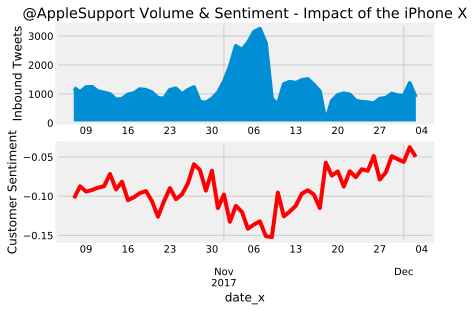

In [193]:
plt.subplot(2, 1, 1)

ax = apple_tweets \
    .groupby(pd.TimeGrouper(key='date_x', freq='24h')) \
    .count() \
    .tweet_id_x.sort_index() \
    .plot(title='@AppleSupport Volume & Sentiment - Impact of the iPhone X', kind='area')
ax.set_ylabel('Inbound Tweets')
    

plt.subplot(2, 1, 2)
ax = apple_tweets \
    .groupby(pd.TimeGrouper(key='date_x', freq='24h')) \
    .all_sent_x.mean() \
    .sort_index() \
    .plot(color='red')
ax.set_ylabel('Customer Sentiment')

plt.savefig('../presentation/apple_iphonex.svg')

In [191]:
apple_tweets.head()

,tweet_id_x,author_id_x,inbound_x,created_at_x,text_x,response_tweet_id_x,in_response_to_tweet_id_x,date_x,time_x,month_x,...,text_y,response_tweet_id_y,in_response_to_tweet_id_y,date_y,time_y,month_y,all_sent_y,group_id_y,tweet_num_y,response_time
5,719,115857,True,Tue Oct 31 22:01:50 +0000 2017,Tf is wrong with my keyboard @115858,718,NaN,2017-10-31 22:01:50,22:01:50,10,...,"@115857 Fill us in on what is happening, then ...",717,719.0,2017-10-31 22:05:00,22:05:00,10,0.4019,group_100,2,3.0
202,447311,220957,True,Thu Nov 30 19:58:01 +0000 2017,Anyone else’s #imac crashing twice a day since...,447309,NaN,2017-11-30 19:58:01,19:58:01,11,...,@220957 It's essential for your Mac to work ju...,447310,447311.0,2017-11-30 20:13:16,20:13:16,11,0.7506,group_100160,2,15.0
203,447319,220958,True,Thu Nov 30 19:54:52 +0000 2017,@AppleSupport I️ thought you fixed the typing ...,447318,NaN,2017-11-30 19:54:52,19:54:52,11,...,@220958 We'd be happy to help. Have you instal...,447316,447319.0,2017-11-30 20:02:34,20:02:34,11,0.7506,group_100161,2,7.0
204,447381,220960,True,Thu Nov 30 19:58:27 +0000 2017,My apple pencil does the opposite of charging ...,447379,NaN,2017-11-30 19:58:27,19:58:27,11,...,@220960 Let's get your Apple Pencil charging c...,447380,447381.0,2017-11-30 20:10:00,20:10:00,11,0.1680,group_100163,2,11.0
205,447384,220961,True,Thu Nov 30 19:59:44 +0000 2017,New feature of @115858 #macOSHighSierra that i...,447383,NaN,2017-11-30 19:59:44,19:59:44,11,...,@220961 We'd love to take a look at this with ...,NaN,447384.0,2017-11-30 20:07:04,20:07:04,11,0.6767,group_100164,2,7.0


In [192]:
apple_tweets.to_pickle('../data/apple.pkl')